In [ ]:
Rossmann 

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [5]:
rawdata = pd.read_csv('../data/train.csv', sep=',', low_memory=False)
# rawdata.to_csv('export.csv')
rawdata.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [6]:
len(rawdata)

1017209

In [7]:
rawdata.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


# Weekdays

In [8]:
rawdata[(rawdata.loc[:,'Open'] == 1) & (rawdata.loc[:,'Date'] == '2015-07-30')].loc[:,'Sales'].mean()

7905.529200359389

In [9]:
#Durchschnittlicher Umsatz nach Wochentagen (Monday - Sunday:1-7)
y = []
for i in range (1,8):
    y.append(rawdata[(rawdata.loc[:,'DayOfWeek'] == i)].loc[:,'Sales'].mean())
y
    

[7809.044510467767,
 7005.244466717926,
 6555.884138262451,
 6247.57591278412,
 6723.27430491275,
 5847.562599322877,
 204.18318938713466]

In [10]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [11]:
y

[7809.044510467767,
 7005.244466717926,
 6555.884138262451,
 6247.57591278412,
 6723.27430491275,
 5847.562599322877,
 204.18318938713466]

In [12]:
from bokeh.io import push_notebook, show, output_notebook

from bokeh.models import ColumnDataSource
from bokeh.palettes import Blues7
from bokeh.plotting import figure
from bokeh.transform import factor_cmap



days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
values = y

source = ColumnDataSource(data=dict(days=days, values=values))

p = figure(x_range=days, plot_height=350, toolbar_location=None, title="Sales per weekday")
p.vbar(x='days', top='values', width=0.9, source=source, legend="sales",
       line_color='white', fill_color=factor_cmap('days', palette=Blues7, factors=days))

p.xgrid.grid_line_color = None
#p.y_range.start = 0
p.y_range.end = 10000
p.legend.orientation = "horizontal"
p.legend.location = "top_right"

show(p)

Sales (Mean-Values) are declining over the course of the week, with the exeption of Fridays. Sunday Sales are very small, due to the fact that only 33 of 1115 Stores are open on sundays.

In [13]:
#List of store opened on sundays
sunday_stores = rawdata[(rawdata.loc[:,'DayOfWeek'] == 7) & (rawdata.loc[:,'Open'] == 1)]['Store'].unique()
print(sunday_stores)

[  85  122  209  259  262  274  299  310  335  353  423  433  453  494
  512  524  530  562  578  676  682  732  733  769  863  867  931  948
 1045 1081 1097 1099  877]


In [14]:
#Number of stores
len(sunday_stores)

33

In [15]:
sunday_data = rawdata[rawdata['Store'].isin(sunday_stores)]

In [16]:
#Durchschnittlicher Umsatz nach Wochentagen (Monday - Sunday:1-7)
y = []
for i in range (1,8):
    y.append(sunday_data[(sunday_data.loc[:,'DayOfWeek'] == i)].loc[:,'Sales'].mean())
y
    

[9395.382393084623,
 8471.626016260163,
 8216.34620596206,
 8276.237299616167,
 8630.849175886204,
 6960.3130118289355,
 6722.345996360327]

In [17]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
values = y

source = ColumnDataSource(data=dict(days=days, values=values))

p = figure(x_range=days, plot_height=350, toolbar_location=None, title="Sales per weekday")
p.vbar(x='days', top='values', width=0.9, source=source, legend="sales",
       line_color='white', fill_color=factor_cmap('days', palette=Blues7, factors=days))

p.xgrid.grid_line_color = None
#p.y_range.start = 0
p.y_range.end = 10000
p.legend.orientation = "horizontal"
p.legend.location = "top_right"

show(p)

## Monatsverlauf:

In [18]:
from datetime import datetime
def convert2day(date_string):
    return datetime.strptime(date_string,'%Y-%m-%d').day

rawdata['Day'] = rawdata['Date'].apply(convert2day)

In [19]:
#Durchschnittlicher Umsatz nach Wochentagen (Monday - Sunday:1-7)
month = []
for i in range (1,32):
    month.append(rawdata[(rawdata.loc[:,'Day'] == i)].loc[:,'Sales'].mean())
month
    

[4658.450603273205,
 6973.664894728983,
 5811.044109302673,
 6818.008361953113,
 6357.150246378976,
 5886.054621472301,
 6014.0506794086905,
 5665.783783783784,
 5253.768164849933,
 5406.580946692549,
 5476.275615947439,
 5203.584321337912,
 5741.5176048977155,
 5381.0103031208,
 5831.355980289682,
 6378.7686725399435,
 6124.26134089891,
 6370.260325518889,
 5826.518112587726,
 5839.835986262506,
 5454.107988651635,
 5470.293743467224,
 5674.454263102882,
 4975.415350156786,
 4823.639808869643,
 4837.208541137823,
 5801.54932059131,
 5881.8216216216215,
 5876.384837425348,
 7297.266655607166,
 6235.653178294574]

In [41]:
# prepare some data
x = [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31.]
y = month
source = ColumnDataSource(dict(x=x, y=y))

# create a new plot with a title and axis labels
p = figure(title="simple line example", x_axis_label='x', y_axis_label='y')
p.y_range.start = 4000
p.y_range.end = 8000

# add a line renderer with legend and line thickness
#p.line(x, y, legend="blue line", line_width=2)

glyph = Step(x="x", y="y", line_width = 3, line_color="#0000ff", mode="center")
p.add_glyph(source, glyph)



# show the results
show(p)

In [22]:
Jahresverlauf

NameError: name 'Jahresverlauf' is not defined

In [23]:
from datetime import datetime
def convert2day(date_string):
    return datetime.strptime(date_string,'%Y-%m-%d').day

def convert2month(date_string):
    return datetime.strptime(date_string,'%Y-%m-%d').month

rawdata['Month'] = rawdata['Date'].apply(convert2month)

In [24]:
#Durchschnittlicher Umsatz nach Wochentagen (Monday - Sunday:1-7)
year = []
for i in range (1,13):
    year.append(rawdata[(rawdata.loc[:,'Month'] == i)].loc[:,'Sales'].mean())
year

[5465.395529153085,
 5645.253149690369,
 5784.57887072665,
 5738.866915794719,
 5489.639972997734,
 5760.9643746885895,
 6064.915711155277,
 5693.016553894571,
 5570.246032520326,
 5537.037419354839,
 6008.111821138212,
 6826.611376868607]

In [43]:
from bokeh.io import push_notebook, show, output_notebook

from bokeh.models import ColumnDataSource
from bokeh.palettes import Blues7
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
from bokeh.models.glyphs import Step

# prepare some data
x = [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]
y = year
source = ColumnDataSource(dict(x=x, y=y))

# create a new plot with a title and axis labels
p = figure(title="simple line example", x_axis_label='x', y_axis_label='y')
p.y_range.start = 5000
p.y_range.end = 7000
p.x_range.start = 0
p.x_range.end = 13


# add a line renderer with legend and line thickness
#p.line(x, y, legend="blue line", line_width=2)

glyph = Step(x="x", y="y", line_width = 3, line_color="#0000ff", mode="center")
p.add_glyph(source, glyph)

# show the results
show(p)

In [28]:
from bokeh.io import push_notebook, show, output_notebook

from bokeh.models import ColumnDataSource
from bokeh.palettes import Blues7
from bokeh.plotting import figure
from bokeh.transform import factor_cmap



days = [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31.]
values = month

source = ColumnDataSource(data=dict(days=days, values=values))

p = figure(x_range=days, plot_height=350, toolbar_location=None, title="Sales per weekday")
p.vbar(x='days', top='values', width=0.9, source=source, legend="sales",
       line_color='white', fill_color=factor_cmap('days', palette=Blues7, factors=days))

p.xgrid.grid_line_color = None
#p.y_range.start = 0
p.y_range.end = 10000
p.legend.orientation = "horizontal"
p.legend.location = "top_right"

show(p)

ValueError: Unrecognized range input: '[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0]'

In [29]:
days = np.linspace(1,31,31)
days

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31.])

In [30]:
len(rawdata[(rawdata.loc[:,'DayOfWeek'] == 7) & (rawdata.loc[:,'Open'] == 1)])

3593

In [31]:
rawdata[(rawdata.loc[:,'DayOfWeek'] == 7) & (rawdata.loc[:,'Open'] == 1)].loc[:,'Sales'].mean()

8224.723907598107

In [32]:
rawdata[(rawdata.loc[:,'DayOfWeek'] == 7) & (rawdata.loc[:,'Open'] == 1) & (rawdata.loc[:,'Store'] == 85)].loc[:,'Store']

5659       85
13464      85
21269      85
29074      85
36879      85
44684      85
52489      85
60294      85
68099      85
75904      85
83709      85
91514      85
99319      85
107124     85
114929     85
122734     85
130539     85
138344     85
146149     85
153954     85
161759     85
169564     85
177369     85
185174     85
192979     85
200784     85
208589     85
216394     85
224199     85
232004     85
           ..
784259     85
792064     85
799869     85
807674     85
815479     85
823284     85
831089     85
838894     85
846699     85
854504     85
862309     85
870114     85
877919     85
885724     85
893529     85
901334     85
909139     85
916944     85
924749     85
932554     85
940359     85
948164     85
955969     85
963774     85
971579     85
979384     85
987189     85
994994     85
1002799    85
1010604    85
Name: Store, Length: 134, dtype: int64

In [33]:
rawdata[(rawdata.loc[:,'Store'] in sunday_stores)]['Sales'].mean()

ValueError: Lengths must match to compare

In [34]:
sales = pd.DataFrame(columns=range(1115),index=range(1000))
for i in range(0,1116):
    sales[i] = pd.Series(rawdata[(rawdata.loc[:,'Store'] == i)].loc[:,'Sales'].values)
sales = sales.drop(0, axis = 1)
sales = sales.dropna(axis = 0, how='all')
sales

,1,2,3,4,5,6,7,8,9,10,...,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115
0,5263.0,6064.0,8314.0,13995.0,4822.0,5651.0,15344.0,8492.0,8565.0,7185.0,...,5901.0,9433.0,6602.0,5263.0,6198.0,5723.0,9626.0,7289.0,27508.0,8680.0
1,5020.0,5567.0,8977.0,10387.0,4943.0,4790.0,11560.0,8420.0,7539.0,6186.0,...,5560.0,8198.0,7187.0,5520.0,4459.0,5263.0,9652.0,7491.0,24395.0,8405.0
2,4782.0,6402.0,7610.0,10514.0,5899.0,5275.0,12074.0,7029.0,7776.0,5524.0,...,5536.0,8168.0,6302.0,6212.0,4600.0,4907.0,9179.0,6640.0,25840.0,7661.0
3,5011.0,5671.0,8864.0,10275.0,6083.0,4839.0,12342.0,6717.0,8751.0,6140.0,...,6037.0,9533.0,8211.0,6478.0,5282.0,6793.0,9583.0,6468.0,25518.0,8093.0
4,6102.0,6627.0,8107.0,11812.0,7059.0,5723.0,14869.0,8739.0,10649.0,7212.0,...,7042.0,11221.0,10717.0,8082.0,6761.0,7742.0,14383.0,7582.0,26720.0,10712.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4364.0,2512.0,3878.0,9322.0,2030.0,2892.0,6574.0,3288.0,5330.0,4713.0,...,2991.0,5706.0,2084.0,3731.0,2907.0,2177.0,6216.0,4784.0,21312.0,6897.0
7,3706.0,3854.0,5080.0,8322.0,3815.0,3804.0,9203.0,4917.0,5464.0,6152.0,...,4438.0,5623.0,4428.0,4415.0,3635.0,3918.0,6220.0,6399.0,19627.0,5816.0
8,3769.0,4108.0,5702.0,7286.0,3713.0,3482.0,9550.0,6109.0,6471.0,6401.0,...,5004.0,5075.0,4695.0,4846.0,3901.0,3587.0,6730.0,6410.0,20564.0,6150.0
9,3464.0,5093.0,5414.0,8503.0,3595.0,3469.0,8214.0,4996.0,5649.0,5561.0,...,3898.0,4797.0,4445.0,4124.0,3692.0,4021.0,6029.0,4565.0,20424.0,5342.0


In [35]:
sales.loc[:,1]

0      5263.0
1      5020.0
2      4782.0
3      5011.0
4      6102.0
5         0.0
6      4364.0
7      3706.0
8      3769.0
9      3464.0
10     3558.0
11     4395.0
12        0.0
13     4406.0
14     4852.0
15     4427.0
16     4767.0
17     5042.0
18     5054.0
19        0.0
20     3530.0
21     3808.0
22     3897.0
23     3797.0
24     3650.0
25     4359.0
26        0.0
27     4797.0
28     4665.0
29     5558.0
        ...  
912    4601.0
913    3725.0
914    4055.0
915       0.0
916    5598.0
917    5586.0
918    5195.0
919    5578.0
920    5720.0
921    5394.0
922       0.0
923    5182.0
924    4127.0
925    4044.0
926    4008.0
927    3900.0
928    4717.0
929       0.0
930    4952.0
931    4881.0
932    4892.0
933    5471.0
934    5580.0
935    7176.0
936       0.0
937    4997.0
938    4486.0
939    4327.0
940    5530.0
941       0.0
Name: 1, Length: 942, dtype: float64

ValueError: setting an array element with a sequence.

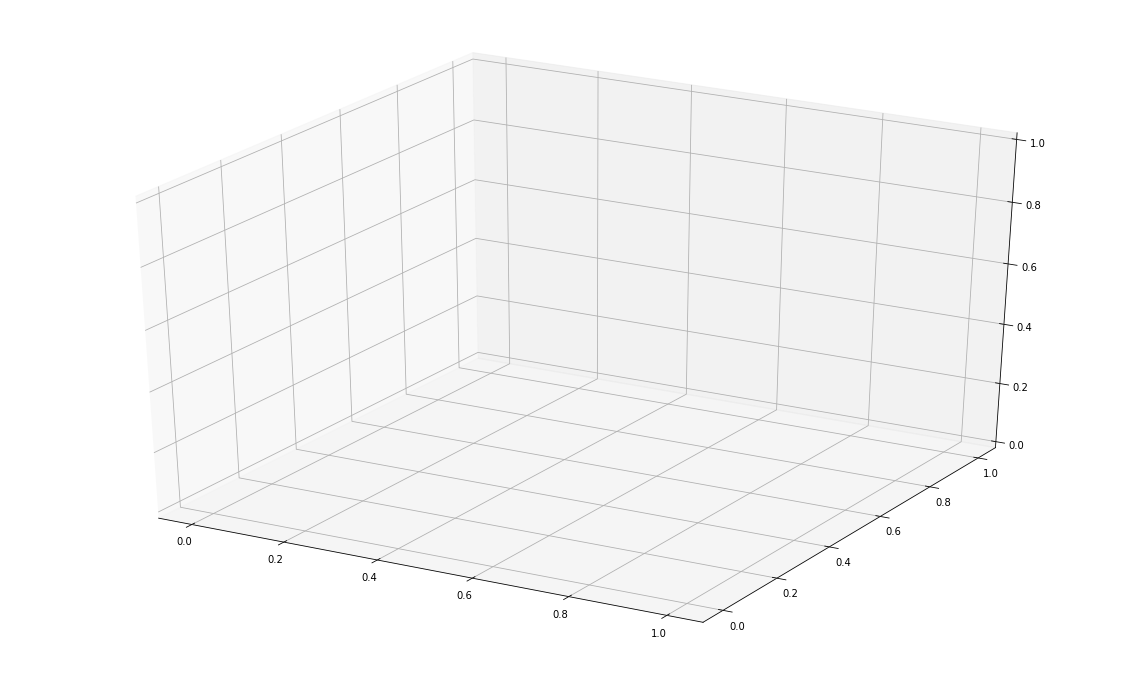

In [131]:


from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,12))


X = np.linspace(-6, 6, 1115)
Y = np.linspace(-6, 6, 942)
Z = sales




ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');





ax = plt.axes(projection='3d')

In [125]:
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

In [128]:
Z

array([[ 8.07261091e-01,  9.41437765e-01,  9.97705708e-01,
         9.80850719e-01,  9.02160390e-01,  7.77003505e-01,
         6.22348946e-01,  4.54593535e-01,  2.87954298e-01,
         1.33543814e-01, -8.84706779e-04, -1.10640850e-01,
        -1.93431827e-01, -2.48533645e-01, -2.75989644e-01,
        -2.75989644e-01, -2.48533645e-01, -1.93431827e-01,
        -1.10640850e-01, -8.84706779e-04,  1.33543814e-01,
         2.87954298e-01,  4.54593535e-01,  6.22348946e-01,
         7.77003505e-01,  9.02160390e-01,  9.80850719e-01,
         9.97705708e-01,  9.41437765e-01,  8.07261091e-01],
       [ 9.41437765e-01,  9.98937218e-01,  9.71132423e-01,
         8.69941049e-01,  7.12998635e-01,  5.20584150e-01,
         3.12742785e-01,  1.07000578e-01, -8.30932252e-02,
        -2.48533645e-01, -3.84629319e-01, -4.90176225e-01,
        -5.66292335e-01, -6.15169883e-01, -6.38962142e-01,
        -6.38962142e-01, -6.15169883e-01, -5.66292335e-01,
        -4.90176225e-01, -3.84629319e-01, -2.48533645e-

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

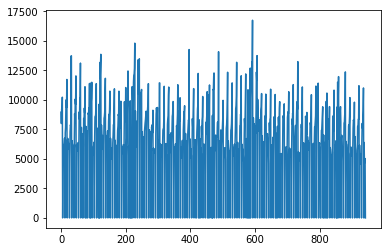

In [116]:
plt.plot(sales.loc[:,12])

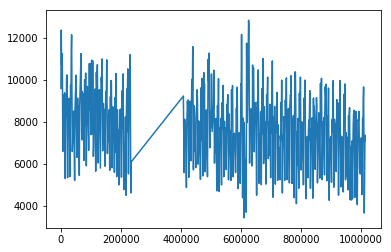

In [30]:
plt.plot(y)

In [12]:
pd.get_dummies(rawdata, columns=['DayOfWeek', 'StateHoliday'])

,Store,Date,Sales,Customers,Open,Promo,SchoolHoliday,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,2015-07-31,5263,555,1,1,1,0,0,0,0,1,0,0,1,0,0,0
1,2,2015-07-31,6064,625,1,1,1,0,0,0,0,1,0,0,1,0,0,0
2,3,2015-07-31,8314,821,1,1,1,0,0,0,0,1,0,0,1,0,0,0
3,4,2015-07-31,13995,1498,1,1,1,0,0,0,0,1,0,0,1,0,0,0
4,5,2015-07-31,4822,559,1,1,1,0,0,0,0,1,0,0,1,0,0,0
5,6,2015-07-31,5651,589,1,1,1,0,0,0,0,1,0,0,1,0,0,0
6,7,2015-07-31,15344,1414,1,1,1,0,0,0,0,1,0,0,1,0,0,0
7,8,2015-07-31,8492,833,1,1,1,0,0,0,0,1,0,0,1,0,0,0
8,9,2015-07-31,8565,687,1,1,1,0,0,0,0,1,0,0,1,0,0,0
9,10,2015-07-31,7185,681,1,1,1,0,0,0,0,1,0,0,1,0,0,0


In [4]:
rawdata[(rawdata.loc[:,'Store'] == 1) & (rawdata.loc[:,'DayOfWeek'] == 6)].loc[:,'Sales']



6690       4364
14495      4406
22300      3530
30105      4797
37910      4019
45715      4097
53520      4256
61325      4183
69130      5592
76935      4276
84740      4431
92545      4945
100350     5850
108155     4318
115960     4594
123765     4173
131570     6709
139375     5208
147180     3909
154985     5225
162790     4592
170595     5289
178400     4475
186205     5015
194010     4663
201815     5363
209620     4840
217425     5255
225230     4599
233035     5023
           ... 
785290     3352
793095     4421
800900     4015
808705     4090
816510     5804
824315     4341
832120     4766
839925     4262
847730     5693
855535     4408
863340     4413
871145     5064
878950     5912
886755     5726
894560     4350
902365     4773
910170     5075
917975     7132
925780     5603
933585     5003
941390     5578
949195     5350
957000     5237
964805     6154
972610     5370
980415     5970
988220     5598
996025     5182
1003830    4952
1011635    4997
Name: Sales, Length: 134

In [6]:
testdata = pd.read_csv('../data/test.csv', sep=',', low_memory=False)
len(testdata)

41088

In [ ]:
data_test[(data_test[0]==j) & (data_test['KNN_test']==j)]

In [8]:
stores = pd.read_csv('data/store.csv', sep=',', low_memory=False)
stores

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN
